# Proyecto Final: Banknote Authentication Dataset

# `ALEJANDRO SÁNCHEZ MONZÓN`

**29/04/2024**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

Para este proyecto hemos utilizado el dataset de **[Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication)** en el que , utilizando una cámara industrial para labores de impresión, que genera imágenes de 400x400 píxeles, hemos podido obtener sus valores de la transformada ondícula (wavelet) para así identificar que billetes son _verdaderos_ que billetes son _falsos_.

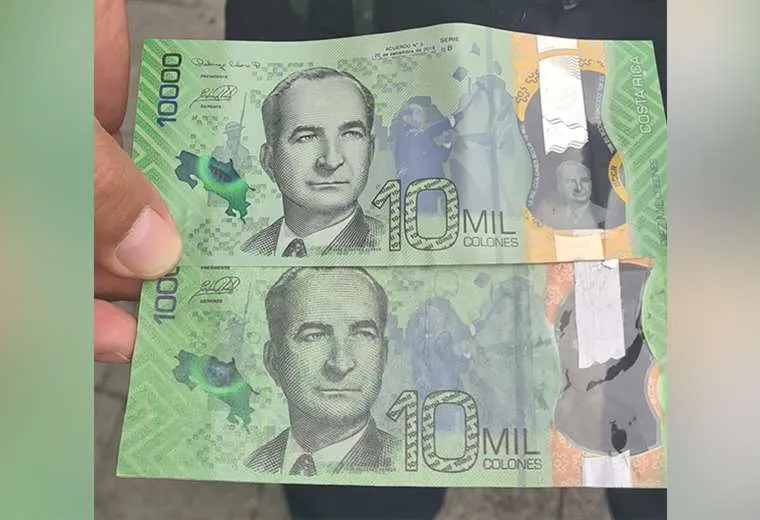

In [3]:
df_bank = pd.read_csv("BankNote_Authentication.csv")

df_bank

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Dado el siguiente dataframe, podemos identificar las siguientes variables:
- **variance**: varianza de la transformada ondícula.
- **skewness**: asimetría de la transformada ondícula.
- **curtosis**: análisis de las colas de la gráfica de la distribución normal.
- **entropy**: entropía de la imagen.
- **class**: variable objetivo que indica si un billete es verdadero o falso.

In [4]:
df_bank.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


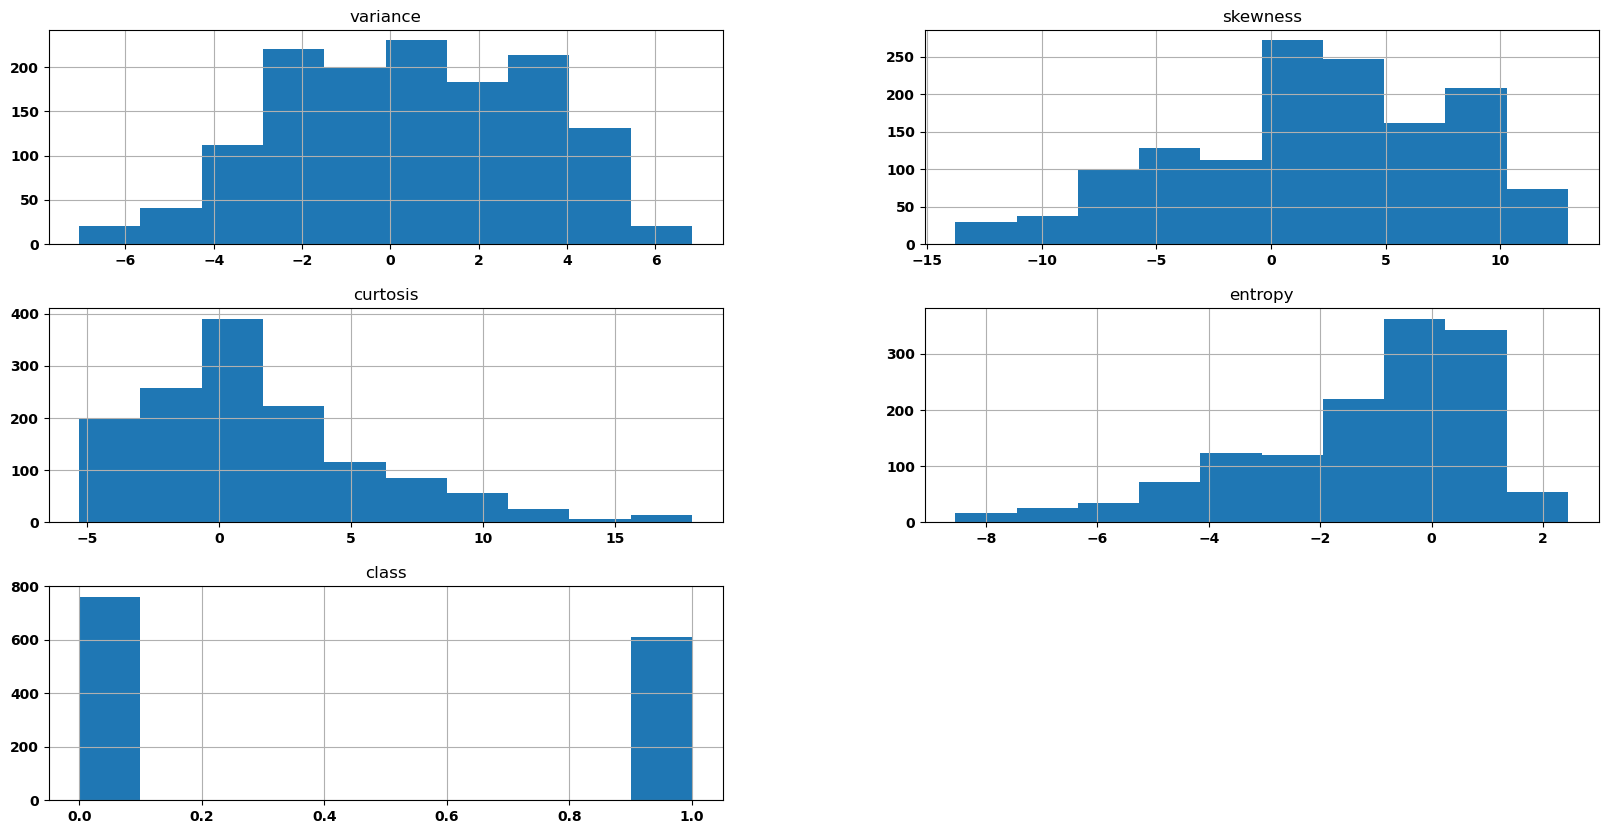

In [5]:
ax = df_bank.hist(figsize=(20,10))
plt.show()

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Podemos observar que no hay valores nulos/perdidos en todo el dataset, de las 5 variables, 4 son **float** y la última (la variable objetivo) es binaria (0 y 1).

In [7]:
print("Registros con valores nulos/perdidos:", df_bank.isna().sum())

Registros con valores nulos/perdidos: variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


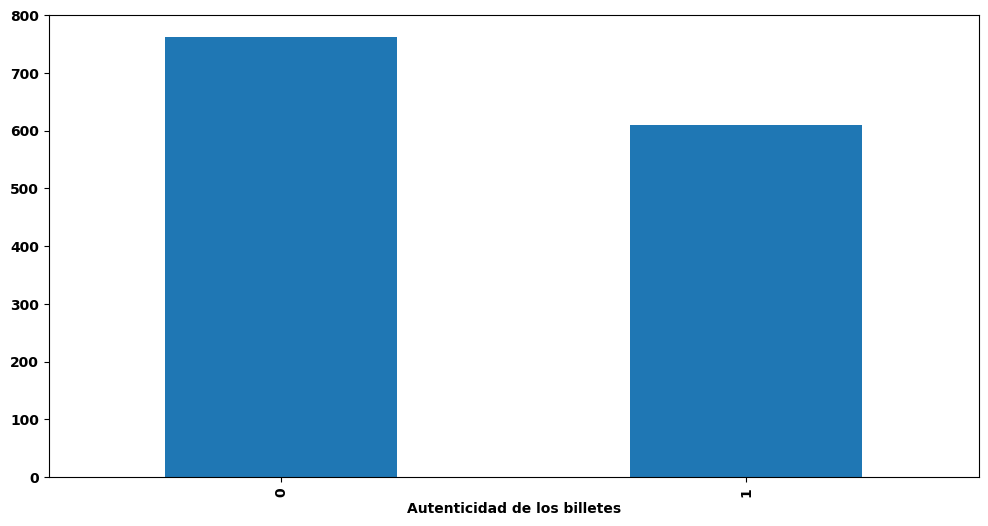

In [8]:
ax = df_bank['class'].value_counts().plot(kind='bar')
ax.set_xlabel('Autenticidad de los billetes')
plt.show()

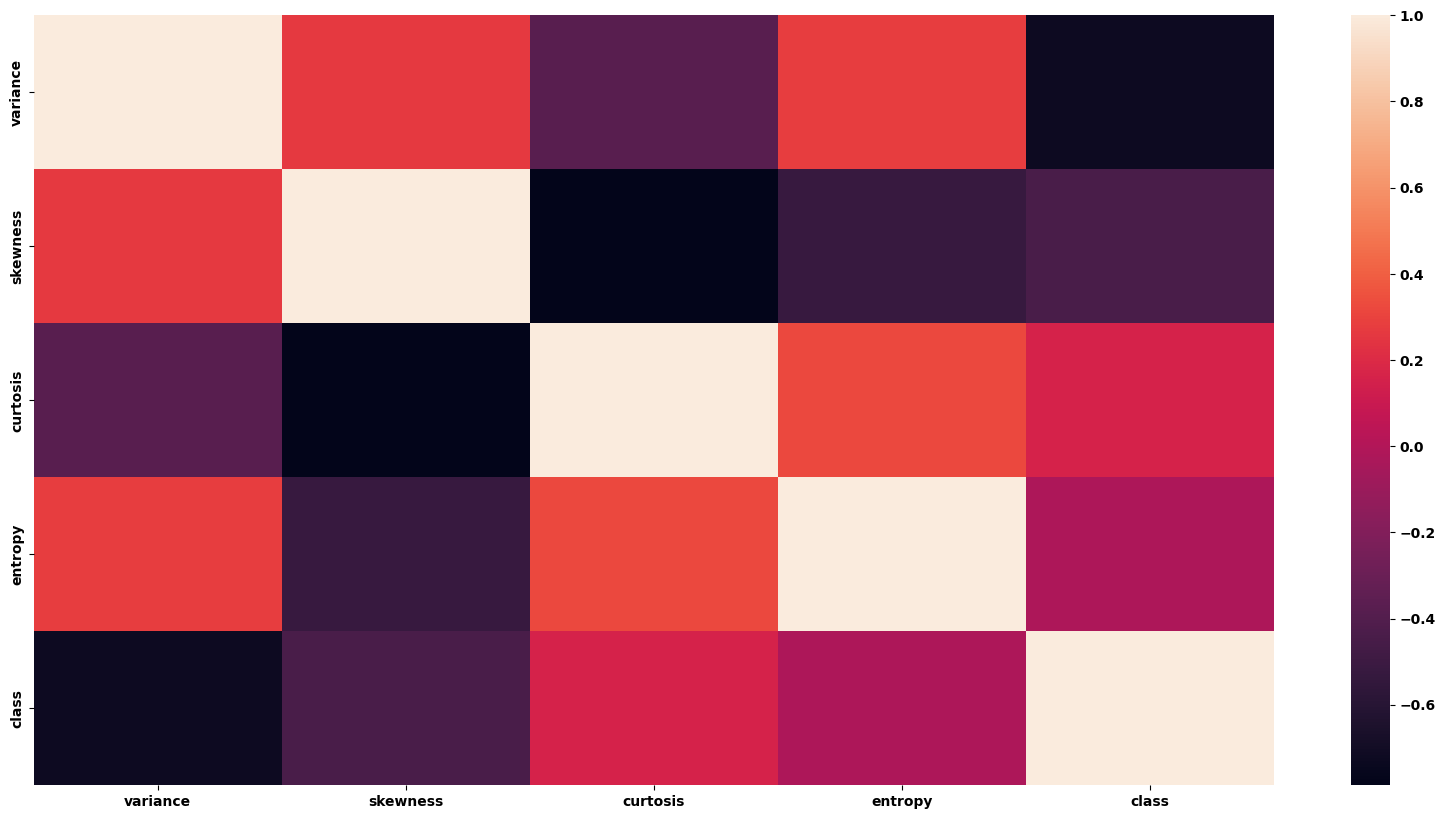

In [9]:
plt.figure(figsize=(20,10))
# sns.heatmap(df_bank.corr(), annot=True)
sns.heatmap(df_bank.corr())
plt.show()

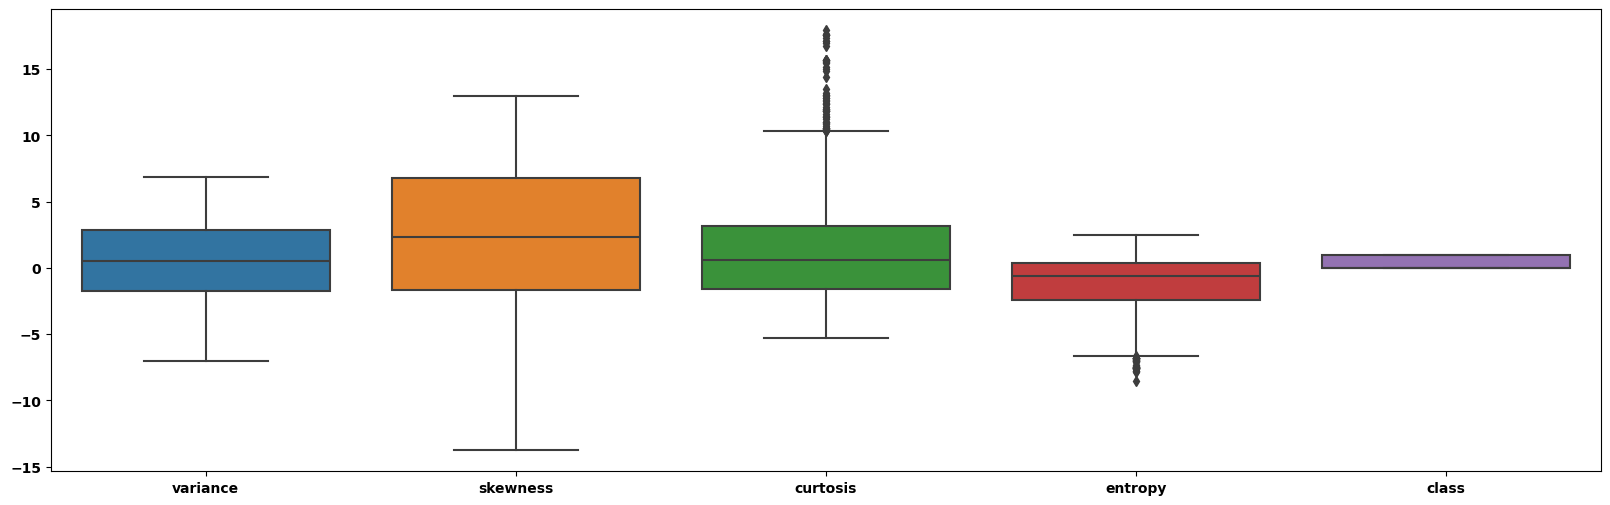

In [10]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df_bank, orient='v')
plt.show()

Podemos analizar que algunas variables como la _curtosis_ llegan a valores cercanos a **15**, mientras que otras variables como la _asimetría_ pueden llegar a valores de **-15**. Por otro lado, hay valores como la variable _class_ que solo puede tener valores de **1 a 0**.

Por todo esto, considero que es importante hacer una _normalización_ de los datos. Para ello, vamos a utilizar **MinMaxScaler**, que te lleva los datos a una escala de **0 a 1**.

In [11]:
X = df_bank.drop('class', axis='columns')
y = df_bank['class']

In [12]:
from sklearn.preprocessing import MinMaxScaler

escalado_bank = MinMaxScaler().fit(X)
df_bank_normal = escalado_bank.transform(X)

df_bank_normal

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [13]:
pd.DataFrame(df_bank_normal, columns=X.columns).describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


In [14]:
X_normal = pd.DataFrame(df_bank_normal, columns=X.columns)
X_normal

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398
1368,0.407690,0.332868,0.506753,0.808350
1369,0.237385,0.011768,0.985603,0.524755
1370,0.250842,0.201701,0.761587,0.660675


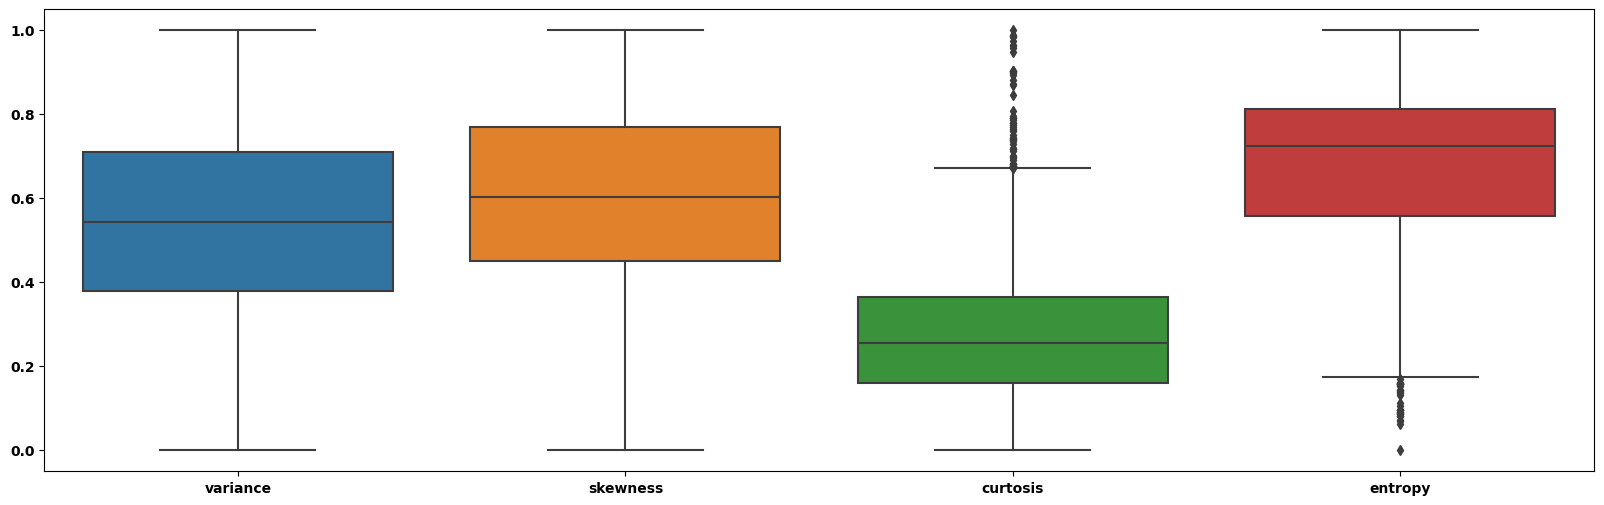

In [15]:
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

Ahora podemos observar como la escala de valores se encuentra unicamente entre **0 y 1**. Con una distribución mucho más compacta.

> A continuación, comenzamos con el desarrollo del modelo
### 1. Dividimos entre el subconjunto de **train** y el subconjunto de **test** los valores del dataset.
Proporción de **30%** del volumen para el subconjunto de test.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.3, random_state=100)

In [17]:
print("Tamaño de train:", X_train.shape[0])
print("Tamaño de test:", X_test.shape[0])

print("\n")

print("Proporción para train:", X_train.shape[0]/df_bank_normal.shape[0])
print("Proporción para test:", X_test.shape[0]/df_bank_normal.shape[0])

print("\n")

print("Suma de ambos conjuntos:", X_train.shape[0] + X_test.shape[0])
print("Tamaño del conjunto de bank normalizado:", df_bank_normal.shape[0])

Tamaño de train: 960
Tamaño de test: 412


Proporción para train: 0.6997084548104956
Proporción para test: 0.30029154518950435


Suma de ambos conjuntos: 1372
Tamaño del conjunto de bank normalizado: 1372


### 2. Creamos un modelo de **XGBoost** para el ejercicio de clasificación.
[XGBoost](https://xgboost.ai/) (**_Extreme Gradient Boosting_**) es un algoritmo predictivo supervisado que utiliza el principio de _boosting_.

Para conseguir un modelo más fuerte que se compone por el conjunto de modelos débiles, **se emplea un algoritmo de optimización**, en este caso **_Gradient Descent_ (descenso de gradiente)**.
Durante el entrenamiento, los parámetros de cada modelo débil son ajustados iterativamente tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción de error en la clasificación, el área bajo la curva (_AUC_), la raíz del error cuadrático medio (_RMSE_) o alguna otra métrica.

Cada modelo es comparado con el anterior. Si un nuevo modelo tiene mejores resultados, entonces se toma este como base para realizar nuevas modificaciones. Si, por el contrario, tiene peores resultados, se regresa al mejor modelo anterior y se modifica ese de una manera diferente.

Este proceso se repite **hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante**, lo cual nos indica que hemos encontrado el mejor modelo posible, o cuando **se llega al número de iteraciones máximas** definido por el usuario.

> _Información obtenida de la **Sesión 14-Bloque3-Clasificación-DT-RF**._

Instalamos la librería de xgboost

In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_jobs=-1, random_state=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

In [20]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("f1_score: ", f1_score(y_test, y_pred_xgb, average="weighted"))
print("AUC: ", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, zero_division=0))

Accuracy:  1.0
f1_score:  1.0
AUC:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Observamos una métrica perfectas, con una precisión del 100% (accuracy 1), un f1_score de 1 y un Área Bajo la Curva ROC de 1.

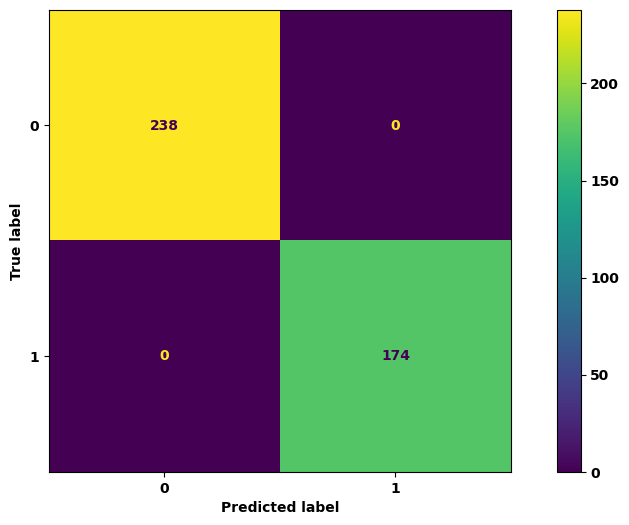

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb),
                               display_labels=xgb_classifier.classes_)
display.plot()

plt.show()

La matriz de confusión muestra **238** billetes que correctamente fueron anotados como **falsos** y **174** billetes que correctamente fueron anotados como **verdaderos**.

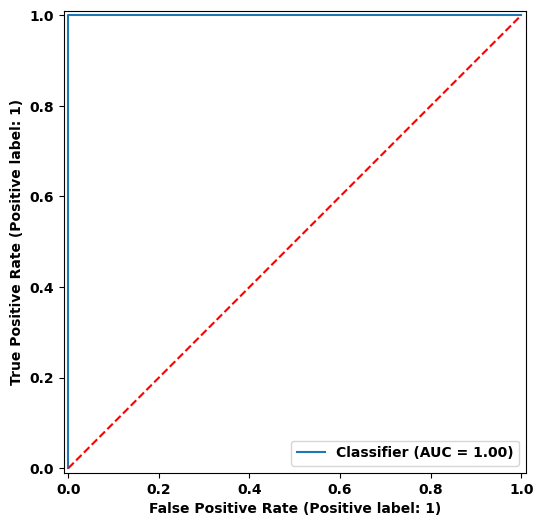

In [23]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_xgb)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.show()


Área bajo la curva ROC perfecta, mostrando el triangulo característico.

### 3. Vamos a crear un modelo con algunos de los hiperparámetros que consideremos óptimos.
- **n_estimators**: de 100 a 500 (inclusive) con pasos de 100 en 100.
- **max-depth**: de 1 a 30 (inclusive) con pasos de 2 en 2.
- **learning_rate**: para la lista de valores [0'01, 0'1, 0'3, 0'5 y 1].

El mejor valor de n_estimators podría ser = 100 que consigue un Accuracy = 1.0


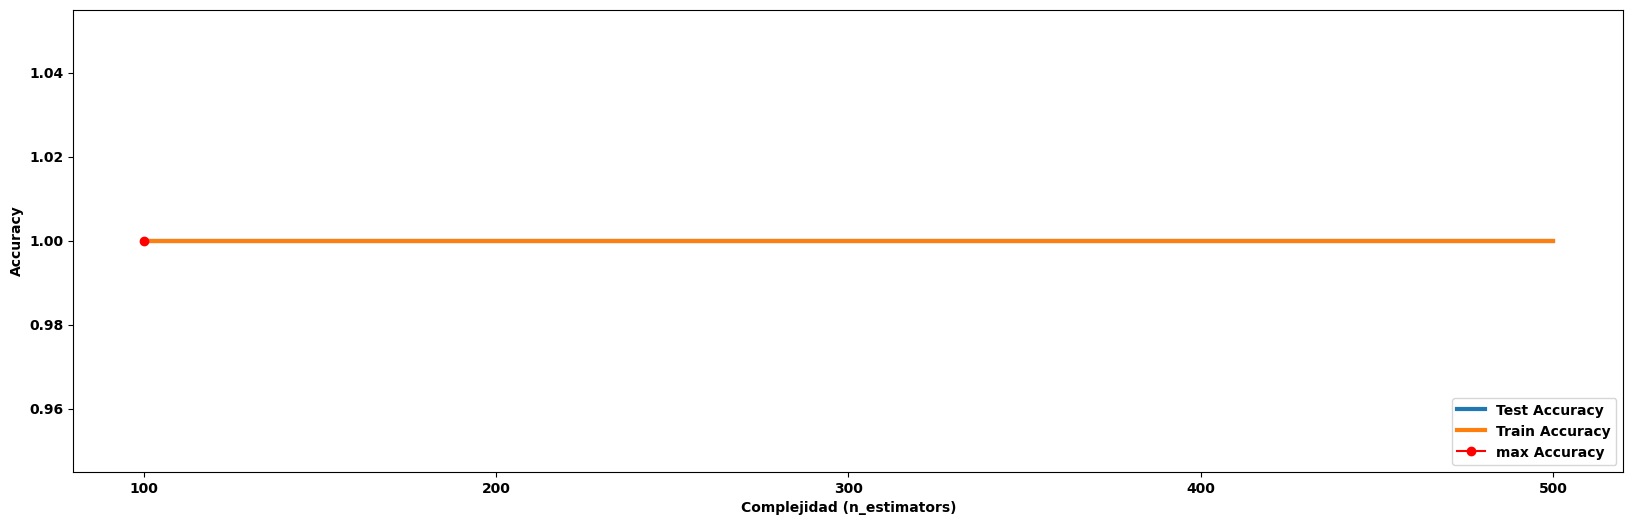

In [24]:
hiper_param_n_arboles = np.arange(100, 501, 100)

train_score_n_arboles = np.zeros(hiper_param_n_arboles.size)
test_score_n_arboles = np.zeros(hiper_param_n_arboles.size)

for i in range(hiper_param_n_arboles.size):
    modelo =XGBClassifier(n_estimators=hiper_param_n_arboles[i],
                          n_jobs=-1,
                          random_state=100)
    modelo.fit(X_train, y_train)
    train_score_n_arboles[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_n_arboles[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de n_estimators podría ser =", hiper_param_n_arboles[np.argmax(test_score_n_arboles)],
      "que consigue un Accuracy =", max(test_score_n_arboles))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_n_arboles, test_score_n_arboles, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_n_arboles, train_score_n_arboles, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_n_arboles[np.argmax(test_score_n_arboles)], max(test_score_n_arboles),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_n_arboles)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 3 que consigue un Accuracy = 1.0


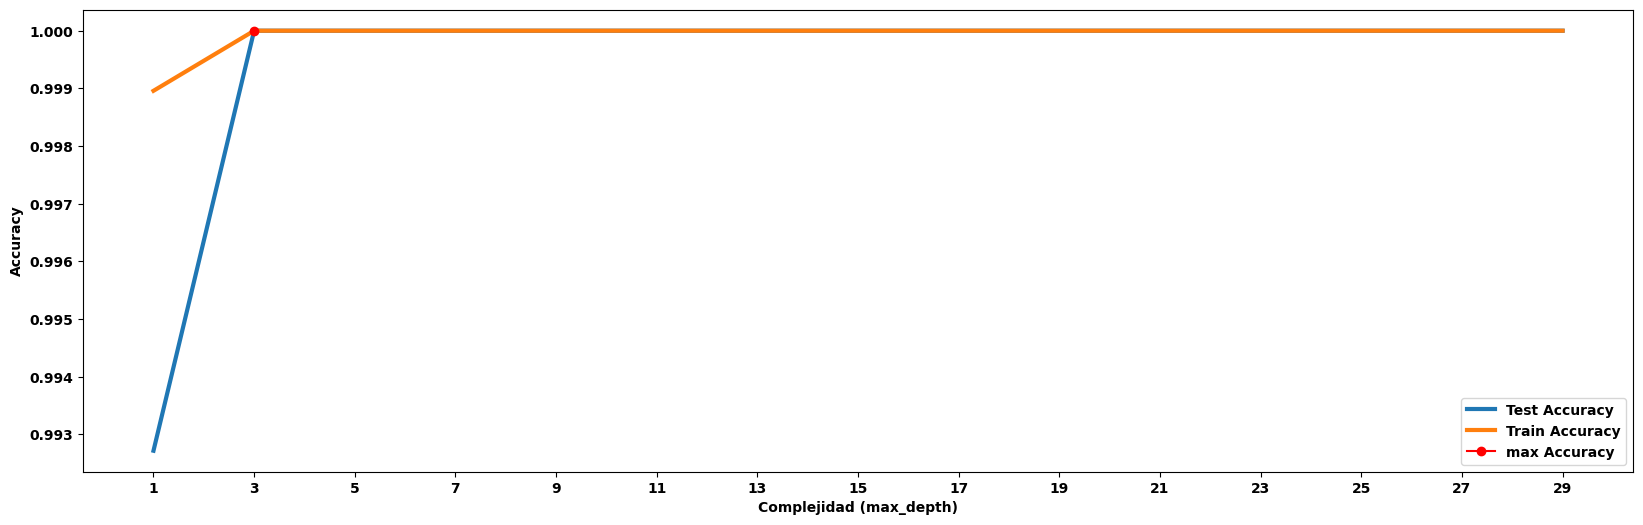

In [25]:
hiper_param_max_depth = np.arange(1, 31, 2)
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]

train_score_max_depth = np.zeros(hiper_param_max_depth.size)
test_score_max_depth = np.zeros(hiper_param_max_depth.size)

for i in range(hiper_param_max_depth.size):
    modelo =XGBClassifier(max_depth=hiper_param_max_depth[i],
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_max_depth[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_max_depth[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de max_depth podría ser =", hiper_param_max_depth[np.argmax(test_score_max_depth)],
      "que consigue un Accuracy =", max(test_score_max_depth))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_max_depth, test_score_max_depth, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_max_depth, train_score_max_depth, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_max_depth[np.argmax(test_score_max_depth)], max(test_score_max_depth),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_max_depth)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.3 que consigue un Accuracy = 1.0


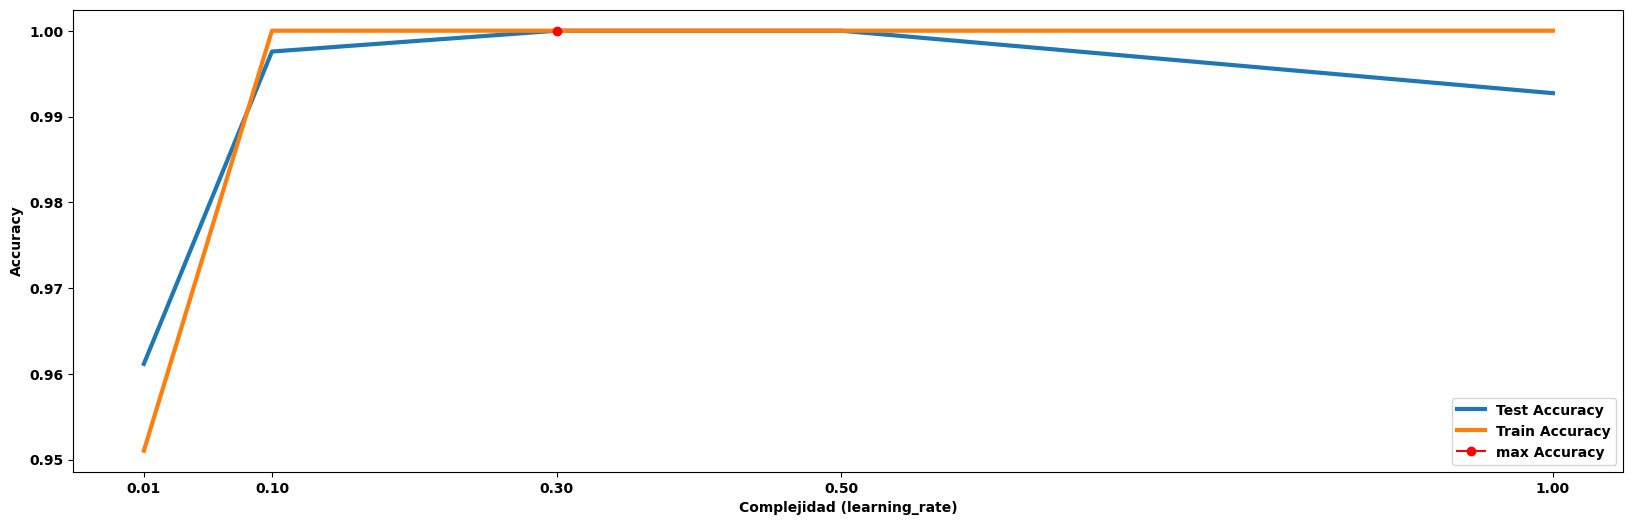

In [26]:
max_depth_xgb = hiper_param_max_depth[np.argmax(test_score_max_depth)]
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]
hiper_param_learning_rate = [0.01, 0.1, 0.3, 0.5, 1]

train_score_learning_rate = np.zeros(len(hiper_param_learning_rate))
test_score_learning_rate = np.zeros(len(hiper_param_learning_rate))

for i in range(len(hiper_param_learning_rate)):
    modelo =XGBClassifier(learning_rate=hiper_param_learning_rate[i],
                          max_depth=max_depth_xgb,
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_learning_rate[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_learning_rate[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de learning_rate podría ser =", hiper_param_learning_rate[np.argmax(test_score_learning_rate)],
      "que consigue un Accuracy =", max(test_score_learning_rate))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_learning_rate, test_score_learning_rate, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_learning_rate, train_score_learning_rate, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_learning_rate[np.argmax(test_score_learning_rate)], max(test_score_learning_rate),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_learning_rate)
plt.xlabel('Complejidad (learning_rate)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### 4. Construimos el modelode XGBoost con los hiperparámetros óptimos.

In [27]:
learning_rate_xgb = hiper_param_learning_rate[np.argmax(test_score_learning_rate)]

modelo_optimo_xgb = XGBClassifier(
    n_jobs=-1,
    max_depth=max_depth_xgb,
    n_estimators=n_arboles_xgb,
    learning_rate=learning_rate_xgb,
    random_state=100
)

modelo_optimo_xgb.fit(X_train, y_train)

y_pred_xgb_optimo = modelo_optimo_xgb.predict(X_test)

In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_optimo))
print("f1_score: ", f1_score(y_test, y_pred_xgb_optimo, average="weighted"))
print("AUC: ", roc_auc_score(y_test, y_pred_xgb_optimo))
print(classification_report(y_test, y_pred_xgb_optimo, zero_division=0))

Accuracy:  1.0
f1_score:  1.0
AUC:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Podemos observar, de nuevo, unas métricas perfectas, con todos los valores a 1.0.

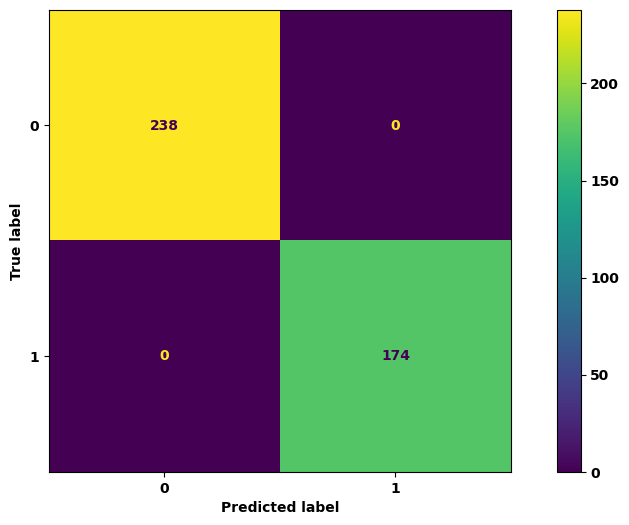

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_optimo),
                               display_labels=xgb_classifier.classes_)
display.plot()

plt.show()

La matriz de confusión muestra **238** billetes que correctamente fueron anotados como **falsos** y **174** billetes que correctamente fueron anotados como **verdaderos**.

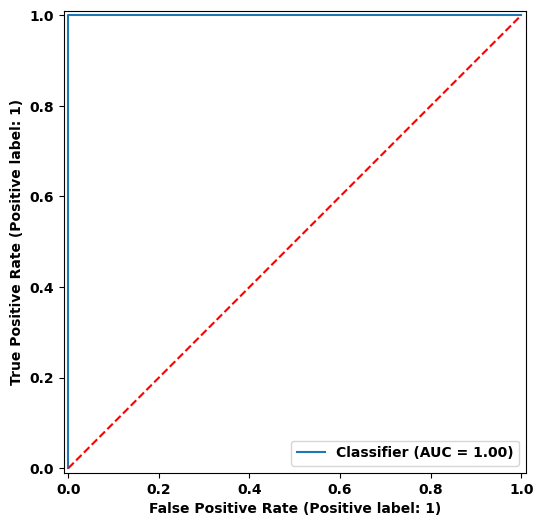

In [30]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb_optimo)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.show()

Área bajo la curva ROC perfecta, mostrando el triangulo característico.

La diferencia final del rendimiento del modelo entre training y test es =  0.0


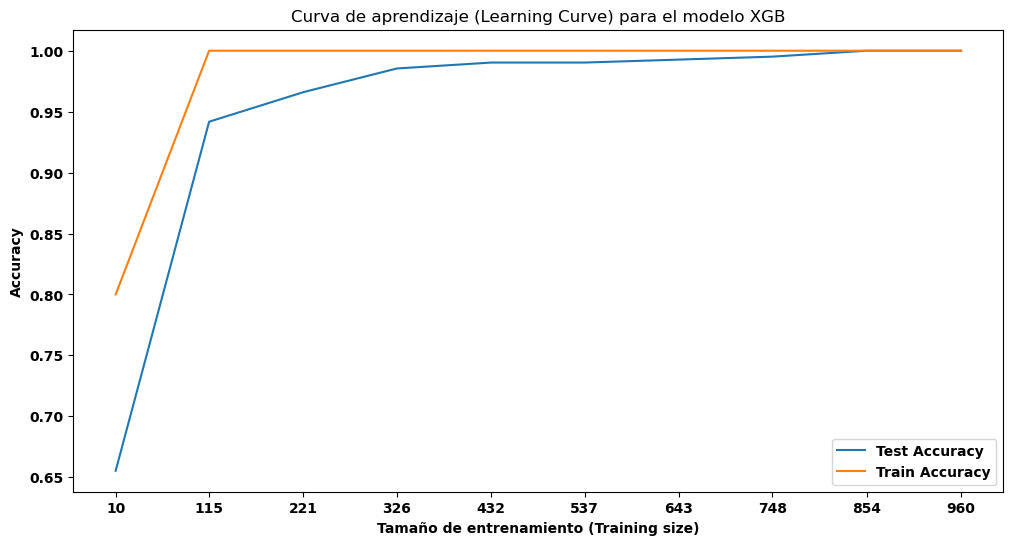

In [31]:
modelo_arbol = XGBClassifier(n_jobs=-1, n_estimators=xgb_classifier.n_estimators, max_depth=xgb_classifier.max_depth, learning_rate=xgb_classifier.learning_rate, random_state=100)

num_samples = np.linspace(10, X_train.shape[0], 10).astype(int)

train_score = np.zeros(num_samples.size)
test_score = np.zeros(num_samples.size)

for i in range(num_samples.size):
    modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]]))
    test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es = ", train_score[-1]-test_score[-1])

plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.xticks(num_samples)
plt.title('Curva de aprendizaje (Learning Curve) para el modelo XGB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### 5. Explicación del resultado obtenido.
Podemos observar una curva de aprendizaje donde la **tendencia** para la gráfica del subconjunto de test y la gráfica del subconjunto de training es **ascendente** según aumente el tamaño del entrenamiento.

Observamos también como llegados al tamaño final del entrenamiento, ambas gráficas llegan a **converger** en un valor de Accuracy igual a 1. 

Podemos decir que este modelo es un modelo que **generaliza correctamente** los datos, y que no presenta ni overfitting (sobreajuste de los datos) ni underfitting (desajuste de los datos).

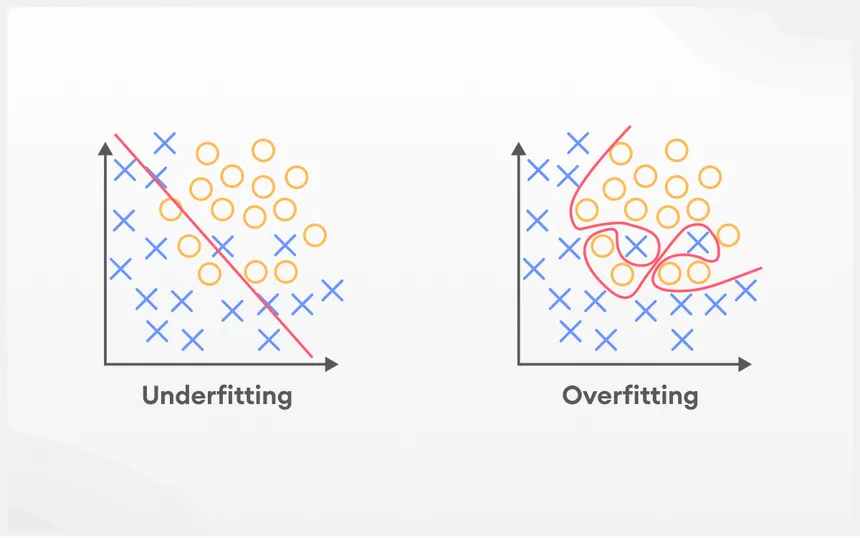

### Bonus: ¿Qué ocurre si usamos otro tipo de modelo?
Como ya se explicó en la presentación, cabía la duda de qúe hubiese ocurrido si hubiesemos utilizado otro modelo que no fuese XGBoost para eset trabajo de clasificación. ¿Presentrá los mismos resultados?

#### KNN
El algoritmo __K-vecinos más cercanos__ o simplemente __[KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)__ se aplica para resolver problemas de _clasificación_ y de _regresión_. _KNN_ es un ___lazy learner___ que no crea realmente ningún modelo en sí. Este método es un modelo de aprendizaje automático que no generaliza (__non-generalizing or instance-based learning__), ya que simplemente __memoriza todos los datos de su conjunto de entrenamiento__. En realidad, no hay una fase de entrenamiento para _KNN_.
> _Información obtenida de la **Sesion15-Bloque3-Clasificacion-Bayes-KNN-SVM**._

In [32]:
# pip install --upgrade numpy scipy scikit-learn threadpoolctl

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = knn_classifier.predict(X_test)

In [43]:
print('Acuuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('AUC:', roc_auc_score(y_test, y_pred_knn))

Acuuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

AUC: 1.0


Una vez más, podemos observar valores perfectos para las diferentes métricas del modelo clasificador. 

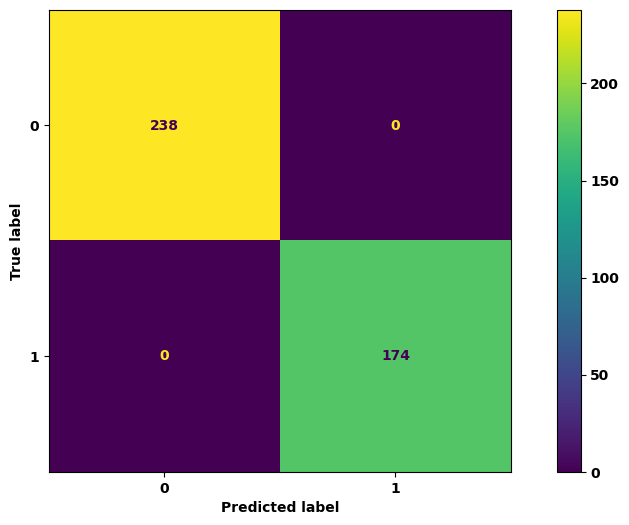

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn),
                               display_labels=knn_classifier.classes_)
display.plot()

plt.show()

La matriz de confusión muestra **238** billetes que correctamente fueron anotados como **falsos** y **174** billetes que correctamente fueron anotados como **verdaderos**.

### Conclusión
Podemos concluir que ambos modelos presentan unas métricas perfectas que demuestran su capacidad predictora para un caso de uso como el que presenta este dataset.

Nos quedamos con el modelo de **XGBoost con los valores óptimos**, que representa un equilibrio entre eficiencia, eficacia y rendimiento (teniendo en cuenta el consumo de recursos, etc.)